# Information about dataset
```
 
   1. class: 
        1 = lung
        2 = head & neck
        3 = esophasus
        4 = thyroid
        5 = stomach
        6 = duoden & sm.int
        7 = colon
        8 = rectum
        9 = anus
        10 = salivary glands
        11 = ancreas
        12 = gallblader
        13 = liver
        14 = kidney
        15 = bladder
        16 = testis
        17 = prostate
        18 = ovary
        19 = corpus uteri
        20 = cervix uteri
        21 = vagina
        22 = breast
    2. age:   <30, 30-59, >=60
    3. sex:   male, female
    4. histologic-type: epidermoid, adeno, anaplastic
    5. degree-of-diffe: well, fairly, poorly
    6. bone: yes, no
    7. bone-marrow: yes, no
    8. lung: yes, no
    9. pleura: yes, no
   10. peritoneum: yes, no
   11. liver: yes, no
   12. brain: yes, no
   13. skin: yes, no
   14. neck: yes, no
   15. supraclavicular: yes, no
   16. axillar: yes, no
   17. mediastinum: yes, no
   18. abdominal: yes, no
```

In [81]:
#importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import scipy.stats as st

In [82]:
#reading a file and adding column names to it.
names=['class','age','sex','histologic-type','degree-of-diffe','bone','bone-marrow','lung','pleura','peritoneum','liver','brain','skin','neck','supraclavicular','axillar','mediastinum','abdominal']
data = pd.read_csv('primary-tumor.csv',header=None,names=names)
data.head()

,class,age,sex,histologic-type,degree-of-diffe,bone,bone-marrow,lung,pleura,peritoneum,liver,brain,skin,neck,supraclavicular,axillar,mediastinum,abdominal
0,1,1,1,?,3,2,2,1,2,2,2,2,2,2,2,2,2,2
1,1,1,1,?,3,2,2,2,2,2,1,2,2,2,1,2,1,2
2,1,1,2,2,3,1,2,2,2,2,2,2,2,2,2,2,1,2
3,1,1,2,?,3,1,2,1,1,2,2,2,2,2,2,2,1,2
4,1,1,2,?,3,1,2,1,1,2,2,2,2,2,2,2,1,2


In [83]:
## types of values in each attribute
data.dtypes

class               int64
age                 int64
sex                object
histologic-type    object
degree-of-diffe    object
bone                int64
bone-marrow         int64
lung                int64
pleura              int64
peritoneum          int64
liver               int64
brain               int64
skin               object
neck                int64
supraclavicular     int64
axillar            object
mediastinum         int64
abdominal           int64
dtype: object

In [84]:
data = data.replace('?',np.NaN)
data.head()

,class,age,sex,histologic-type,degree-of-diffe,bone,bone-marrow,lung,pleura,peritoneum,liver,brain,skin,neck,supraclavicular,axillar,mediastinum,abdominal
0,1,1,1,NaN,3,2,2,1,2,2,2,2,2,2,2,2,2,2
1,1,1,1,NaN,3,2,2,2,2,2,1,2,2,2,1,2,1,2
2,1,1,2,2,3,1,2,2,2,2,2,2,2,2,2,2,1,2
3,1,1,2,NaN,3,1,2,1,1,2,2,2,2,2,2,2,1,2
4,1,1,2,NaN,3,1,2,1,1,2,2,2,2,2,2,2,1,2


## Creating another catefory for the missing values 

```
I have replaced all the NaN values with integer number 5. So that in all the columns which contains NaN values will have another category 5 which can be interpreted as 'Unknown'.
```

In [85]:
#We can create another category for the missing values and use them as a different level. 
data = data.fillna(5)
data.head()

,class,age,sex,histologic-type,degree-of-diffe,bone,bone-marrow,lung,pleura,peritoneum,liver,brain,skin,neck,supraclavicular,axillar,mediastinum,abdominal
0,1,1,1,5,3,2,2,1,2,2,2,2,2,2,2,2,2,2
1,1,1,1,5,3,2,2,2,2,2,1,2,2,2,1,2,1,2
2,1,1,2,2,3,1,2,2,2,2,2,2,2,2,2,2,1,2
3,1,1,2,5,3,1,2,1,1,2,2,2,2,2,2,2,1,2
4,1,1,2,5,3,1,2,1,1,2,2,2,2,2,2,2,1,2


## Tumor-wise frequency diagram

In [86]:
data['class'].value_counts()

1     84
5     39
18    29
11    28
14    24
22    24
2     20
12    16
7     14
4     14
17    10
3      9
13     7
19     6
8      6
15     2
10     2
20     2
16     1
21     1
6      1
Name: class, dtype: int64

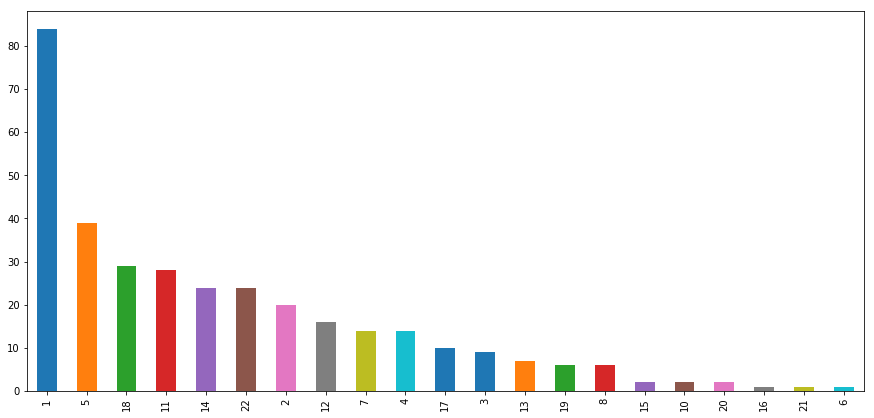

In [87]:
data['class'].value_counts().plot(kind='bar',figsize=(15,7))

## Observation:
``` 
People affected with Lung cancer are maximum.
```

## Age wise comparison to lung cancer
```
age classes:
1 = <30
2 = 30-59
3 = >59
```

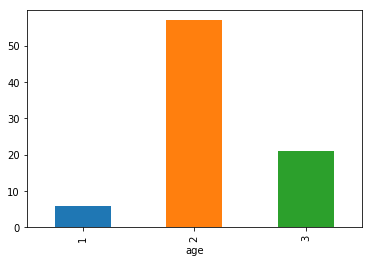

In [88]:
data.groupby('age')['class'].value_counts().unstack().loc[:,1].plot(kind = 'bar')

```
People having age between 30-59 are maximum affected with lung cancer.
```

## Age-wise comparison to all type of cancers.

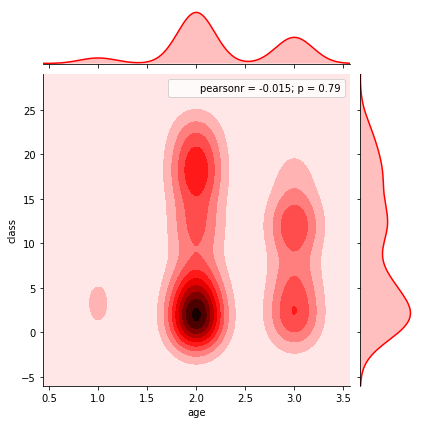

In [89]:
x = sns.jointplot('age','class',data = data,kind = 'kde', color = 'red')

### Observation:
```
In all types of cancer, people having age between 30-59 years are maximum.
```

##  Diseased Lungs' effect on different type of cancer:

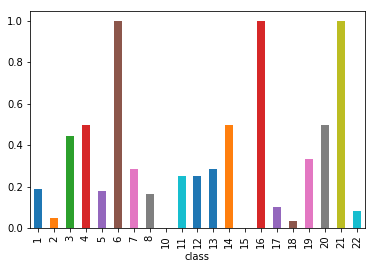

In [90]:
data.groupby('class')['lung'].value_counts(normalize = True).unstack().loc[:,1].plot(kind= 'bar')


### Observation:
```
According to above graph, diseased lungs don't causes more to happen lung cancer. But surprisingly, diseased lungs causes more to happen duoden & sm.int, testis and vagina cancer.
```

## Diseased liver's effect on different type of cancer

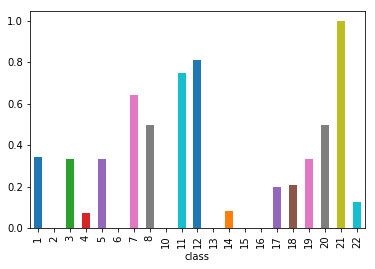

In [91]:
data.groupby('class')['liver'].value_counts(normalize = True).unstack().loc[:,1].plot(kind = 'bar')

## Observation:
```
Liver cancer class is 13th one.
And from the graph we can see that 13th class has no instances when liver is diseased and there is liver cancer.
```

TypeError: must be str, not int

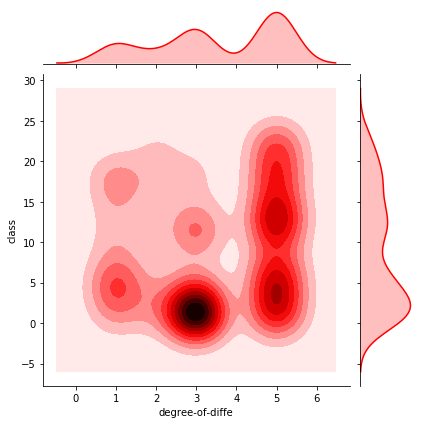

In [92]:
x = sns.jointplot('degree-of-diffe','class',data = data,kind = 'kde', color = 'red')

### Observation:
```
Degree of differentiation is poorly in class 0-4(lung, head & neck, esophasus, thyroid) cancer. while it's well in class 5-7(stomach, duoden & sm.int, colon) cancer.
```